<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/Barrages/PowerLimits/PowerLimits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as mpl
import os, pathlib

if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )
import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

In [8]:
from matplotlib.colors import LinearSegmentedColormap
color_list = ['#AAFFAA','#FFFFAA','#FFAAAA']
mycmap = LinearSegmentedColormap.from_list("",color_list)

In [9]:
π = np.pi
two_π = 2.0 * π
rpm2rads = π / 30.0
gr = 9.8
sqrt_gr = np.sqrt( gr )

In [10]:
def Energy_star( τ1, τ2, z1_max ):
  z2 = np.cos( two_π * τ2 )
  e1 = ( z1_max**2 - z2**2 ) / 2.0
  e2 = ( z1_max - z2 ) / ( two_π * ( τ1 - τ2 ) ) * ( np.sin( two_π * τ2 ) - np.sin( two_π * τ1 ) )
  return ( e1 + e2 ) / 2.0

In [11]:
τ1_vec = np.linspace( 0.0, 0.4999, 200 )
τ2_vec = np.linspace( 0.5, 1.0, 200 )
T1, T2 = np.meshgrid( τ1_vec, τ2_vec )
ZE = Energy_star( T1, T2, 1.0 ) * 100.0

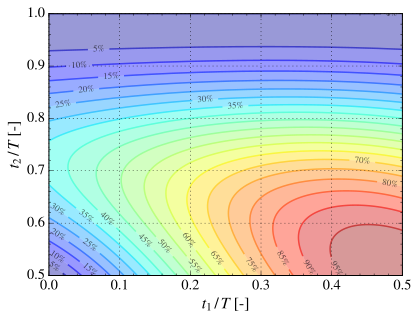

In [12]:
CS = mpl.contourf( T1, T2, ZE, 20, cmap = mpl.cm.jet, alpha = 0.4 )
CS = mpl.contour ( T1, T2, ZE, 20, alpha = 0.6 )
mpl.clabel( CS, CS.levels, fmt='$%.0f$%%', inline = True, fontsize=9, colors = 'k', rightside_up = True )
mpl.xlabel( r'$t_1\,/\,T$ [-]' ) 
mpl.ylabel( r'$t_2\,/\,T$ [-]' )
mpl.xlim( 0.0, 0.5 )
mpl.grid()
mpl.minorticks_on()
mpl.savefig('EnergyDeltaTau.pdf', bbox_inches='tight', pad_inches=0)